### MultiClass Classification Problem

In [1]:
from myutils import *

In [41]:
#import
from keras import layers, models, optimizers, losses, metrics
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
import numpy as np

**Load the data into variable**

In [56]:
#(train_data, train_label),(test_data, test_label) = reuters.load_data()  # it will load all the data
(train_data, train_label),(test_data, test_label) = reuters.load_data(num_words=10000)   

In [57]:
type(train_data)

numpy.ndarray

In [58]:
train_data[:3]

array([ list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110

In [59]:
train_label

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [60]:
print("train_size", len(train_data))
print("test_size", len(test_data))

train_size 8982
test_size 2246


**Decoding the data back to text**

In [61]:
word_index = reuters.get_word_index()
rev_word_index = reverse_dict(word_index)

In [62]:
decoded_review = ' '.join([rev_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [63]:
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [64]:
len(train_data[0])

87

**to know what is the max word index**

In [65]:
max([max(i) for i in train_data])

9999

* To Vectorize the data below steps to be followed 
* Create a Zero vector with Max size of length of data and max index from word dictionary
* Assign each row in each row of vectorize data and set the word index value as 1

In [66]:
def vectorize(data, dimention=10000):
    tns = np.zeros((len(data), dimention))
    for idx,seq in enumerate(data):
        tns[idx, seq] =  1
    return tns

In [67]:
#vec_train_data = vectorize(train_data, 40000)
vec_train_data = vectorize(train_data)

In [68]:
vec_train_data[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [69]:
#vec_test_data = vectorize(test_data, 40000)
vec_test_data = vectorize(test_data)

**Vectorizing the labels**  
* Either use above vectorization method  
* Or use the One hot encoder 
* Or use Keras built in way

In [70]:
#max([max(i) for i in list(train_label)])
max(train_label)   # 45, means total labels are 46

45

In [71]:
# Using above Vectorization Method
vec_train_label = vectorize(train_label, 46)
vec_test_label = vectorize(test_label, 46)
vec_train_label[:2]

array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [72]:
# Using Keras Utility
oneHot_train_labels = to_categorical(train_label)
oneHot_test_labels = to_categorical(test_label)
oneHot_train_labels[:2]

array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.]])

#### Building the network

In [102]:
model = models.Sequential()
#model.add(layers.Dense(64, activation='relu', input_shape=(40000,)))
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [103]:
# Compiling the netwrok
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.categorical_crossentropy, metrics=['accuracy'])

#### Splitting the train data into validation

In [104]:
def split_data(data, n):
    '''
    data - input data
    n - no of rows to keep in validation set
    validation_data, train_data - Output
    '''
    #l = len(data)-n
    return data[:n],data[n:]

In [106]:
x_val, x_partial_val = split_data(vec_train_data, 1000)
y_val, y_partial_val = split_data(vec_train_label, 1000)
print(len(x_val),len(x_partial_val))
print(len(y_val),len(y_partial_val))

1000 7982
1000 7982


#### Fitting the data

In [107]:
history = model.fit(x_partial_val, y_partial_val,
         batch_size=512,
         epochs=20,
         validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 132us/step - loss: 2.6327 - acc: 0.5316 - val_loss: 1.7183 - val_acc: 0.6300
Epoch 2/20
7982/7982 [==============================] - 1s 132us/step - loss: 1.3885 - acc: 0.7072 - val_loss: 1.2903 - val_acc: 0.7260
Epoch 3/20
7982/7982 [==============================] - 1s 133us/step - loss: 1.0198 - acc: 0.7870 - val_loss: 1.1111 - val_acc: 0.7650
Epoch 4/20
7982/7982 [==============================] - 1s 131us/step - loss: 0.7997 - acc: 0.8348 - val_loss: 1.0178 - val_acc: 0.7900
Epoch 5/20
7982/7982 [==============================] - 1s 133us/step - loss: 0.6336 - acc: 0.8705 - val_loss: 0.9538 - val_acc: 0.8040
Epoch 6/20
7982/7982 [==============================] - 1s 132us/step - loss: 0.5069 - acc: 0.8930 - val_loss: 0.9242 - val_acc: 0.8110
Epoch 7/20
7982/7982 [==============================] - 1s 132us/step - loss: 0.4128 - acc: 0.9113 - val_loss: 0.9082 - val_acc: 0.8200


In [108]:
print(history)

In [109]:
hist = history.history
print(hist)
print(list(hist))

{'val_loss': [1.718338927268982, 1.2902612428665161, 1.1110550746917724, 1.0178487968444825, 0.95381686496734619, 0.92421503734588628, 0.90824503755569463, 0.87459175777435305, 0.91479012918472291, 0.89291025400161739, 0.95784914684295652, 0.93271513128280636, 0.92437453556060789, 0.9745326108932495, 0.96915366458892827, 0.98298859691619878, 1.0032214021682739, 1.0353722333908082, 1.0751850337982178, 1.0794835023880005], 'val_acc': [0.62999999856948852, 0.72600000810623166, 0.76499998664855962, 0.78999999904632567, 0.8040000076293945, 0.81099998712539678, 0.820000009059906, 0.82399999332427976, 0.81400000905990599, 0.8179999957084656, 0.80099999809265132, 0.81400001144409184, 0.825000009059906, 0.80999999570846559, 0.81799999809265134, 0.81099998712539678, 0.81200001382827758, 0.80100001382827757, 0.79499999189376835, 0.80599998712539678], 'loss': [2.6327389852351279, 1.3885438689549923, 1.0198346368354294, 0.79968023495816309, 0.63355072483745201, 0.50685355884184724, 0.41281572144839

#### Let's plot these value to check if all went well

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
val_loss = hist['val_loss']
val_acc = hist['val_acc']
loss = hist['loss']
acc = hist['acc']

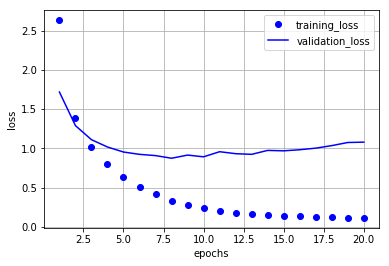

In [112]:
epochs = range(1,len(val_loss)+1)
plt.plot(epochs, loss, 'bo', label='training_loss')
plt.plot(epochs, val_loss, 'b', label='validation_loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.grid()

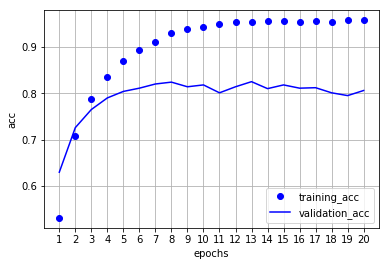

In [113]:
plt.clf()
plt.plot(epochs, acc, 'bo', label='training_acc')
plt.plot(epochs, val_acc, 'b', label='validation_acc')
plt.xlabel("epochs")
plt.ylabel("acc")
plt.xticks(epochs)  # controlling the xticks
plt.legend()
plt.grid()

In [114]:
res=model.evaluate(vec_test_data, vec_test_label)
print(res)
print(type(res))

2246/2246 [==============================] - 0s 106us/step
[1.2341651619276826, 0.77871772044488397]
<class 'list'>


#### Retraining the model with 9 epochs

In [115]:
model2 = models.Sequential()
#model2.add(layers.Dense(64, activation='relu', input_shape=(40000,)))
model2.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(46, activation='softmax'))

# Compiling the netwrok
model2.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.categorical_crossentropy, metrics=['accuracy'])

history = model2.fit(x_partial_val, y_partial_val,
         batch_size=512,
         epochs=9,
         validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 128us/step - loss: 2.6542 - acc: 0.5050 - val_loss: 1.7468 - val_acc: 0.6460
Epoch 2/9
7982/7982 [==============================] - 1s 134us/step - loss: 1.4306 - acc: 0.6989 - val_loss: 1.3101 - val_acc: 0.6950
Epoch 3/9
7982/7982 [==============================] - 1s 132us/step - loss: 1.0614 - acc: 0.7675 - val_loss: 1.1281 - val_acc: 0.7460
Epoch 4/9
7982/7982 [==============================] - 1s 132us/step - loss: 0.8359 - acc: 0.8192 - val_loss: 1.0251 - val_acc: 0.7800
Epoch 5/9
7982/7982 [==============================] - 1s 132us/step - loss: 0.6637 - acc: 0.8597 - val_loss: 0.9756 - val_acc: 0.7940
Epoch 6/9
7982/7982 [==============================] - 1s 132us/step - loss: 0.5329 - acc: 0.8908 - val_loss: 0.9405 - val_acc: 0.7960
Epoch 7/9
7982/7982 [==============================] - 1s 131us/step - loss: 0.4301 - acc: 0.9083 - val_loss: 0.8953 - val_acc: 0.8170
Epoch 8

In [116]:
res=model2.evaluate(vec_test_data, vec_test_label)
print(res)

2246/2246 [==============================] - 0s 103us/step
[0.97157744987671224, 0.78806767592128646]


### We have got ~79% accuracy which is better than Random baseline

In [167]:
import copy
test_copy_labels = copy.copy(vec_test_label)  # creating copy
np.random.shuffle(test_copy_labels)    # randomizing the data
# hit_ratio = (np.array(vec_test_label) == np.array(test_copy_labels))   # checking hit ratio if randomizing the data
hit_ratio = np.all(np.equal(np.array(vec_test_label), np.array(test_copy_labels)), axis=1)
float(np.sum(hit_ratio))/len(vec_test_label)            # calculating percentage

0.1736420302760463

In [165]:
print(np.all(np.equal(a, b), axis=1))  # row wise
print(np.all(np.equal(a, b), axis=0))  # column wise

[False]
[ True  True False]


**Predictions**

In [168]:
y_pred = model2.predict(vec_test_data)

In [170]:
y_pred[0].shape

(46,)

In [171]:
np.argmax(y_pred[0])  # the class with the highest probability

3

In [172]:
y_pred[0]

array([  6.16715843e-05,   5.65982082e-05,   2.35745247e-05,
         8.00953567e-01,   1.90865010e-01,   5.98991483e-06,
         1.45337588e-04,   1.57539107e-05,   1.64507993e-03,
         1.47192541e-05,   4.42292258e-05,   1.41249609e-03,
         1.82468968e-04,   2.79160722e-05,   2.03483032e-05,
         1.95928242e-05,   6.04793255e-04,   3.09686002e-05,
         3.86290267e-05,   9.71203204e-04,   1.63639488e-03,
         5.85424241e-05,   3.42260159e-06,   9.95761366e-05,
         6.92684716e-06,   2.00190061e-05,   2.83790996e-06,
         1.74804809e-05,   1.46247094e-05,   5.10351238e-05,
         2.56322208e-04,   2.25235617e-05,   1.69888081e-05,
         1.36356421e-05,   6.89603985e-06,   5.14819731e-05,
         1.29667809e-04,   1.11378986e-05,   1.83079119e-05,
         1.46070292e-04,   4.27914383e-05,   1.86431615e-04,
         1.45107117e-06,   3.76555327e-05,   4.41316206e-06,
         3.41581267e-06], dtype=float32)

In [173]:
np.sum(y_pred[0])  # the summation of all the probabilty is ~1

0.99999994